## Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer

import re

In [2]:
# read the file using "Windows codepage 1252"
df=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/Elon_musk.csv',encoding='cp1252') 
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
# dropping the unnecessary column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.shape

(1999, 1)

In [5]:
df

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
pd.set_option('max_colwidth',800)
df.head(10)

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely


# Text Processing 

In [7]:
# lets first remove the Https and @ from the text

import re

df.Text=[re.sub(r'http\S+', '',x, flags=re.MULTILINE)for x in df.Text]

df.Text=[re.sub('@[^\s]+','',x)for x in df.Text]

df.head(10)

,Text
0,I’m an alien
1,Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all."
7,Haha thanks :)
8,Indeed! Tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely


In [8]:
#only keep characters
df.Text=df.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [9]:
df

,Text
0,Im an alien
1,Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execution last year Now on to the next for even more
...,...
1994,True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me
1995,Make sure to read ur terms amp conditions before clicking accept
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is UFUF


In [10]:
# convert to all lower case

df.Text=df.Text.apply(lambda x: x.lower())

In [11]:
df

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execution last year now on to the next for even more
...,...
1994,true it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me
1995,make sure to read ur terms amp conditions before clicking accept
1996,samwise gamgee
1997,altho dumb and dumber is ufuf


In [12]:
# remove 2 letter words

short = re.compile(r'\W*\b\w{1,2}\b')


df['Text']=[short.sub('',x)for x in df.Text]

In [13]:
# split the words
df.Text=df.Text.apply(lambda x: x.split())



In [14]:
df

,Text
0,[alien]
1,"[ray, tracing, cyberpunk, with, hdr, nextlevel, have, you, tried]"
2,"[great, interview]"
3,"[doge, underestimated]"
4,"[congratulations, tesla, china, for, amazing, execution, last, year, now, the, next, for, even, more]"
...,...
1994,"[true, sounds, surreal, but, the, negative, propaganda, still, all, out, there, amp, easy, find, social]"
1995,"[make, sure, read, terms, amp, conditions, before, clicking, accept]"
1996,"[samwise, gamgee]"
1997,"[altho, dumb, and, dumber, ufuf]"


In [15]:
# remove stopwords
import nltk
from nltk.corpus import stopwords


## Loading stopwords 
my_stopwords = stopwords.words('english')

In [16]:
df.Text=df.Text.apply(lambda x: [word  for word in x if word not in set(my_stopwords)])

In [17]:
df.head(10)

,Text
0,[alien]
1,"[ray, tracing, cyberpunk, hdr, nextlevel, tried]"
2,"[great, interview]"
3,"[doge, underestimated]"
4,"[congratulations, tesla, china, amazing, execution, last, year, next, even]"
5,"[happy, new, year]"
6,"[frodo, underdogeall, thought, would, failhimself]"
7,"[haha, thanks]"
8,"[indeed, tweets, definitely, represent, realworld, time, allocation]"
9,"[entertaining, outcome, likely]"


In [18]:
# stemming the words
#df.Text=df.Text.apply(lambda x: [ps.stem(word) for word in x])
#df

In [19]:

from nltk.stem import SnowballStemmer
sn = SnowballStemmer(language='english')

df.Text=df.Text.apply(lambda x: [sn.stem(word) for word in x])

In [20]:
df

,Text
0,[alien]
1,"[ray, trace, cyberpunk, hdr, nextlevel, tri]"
2,"[great, interview]"
3,"[doge, underestim]"
4,"[congratul, tesla, china, amaz, execut, last, year, next, even]"
...,...
1994,"[true, sound, surreal, negat, propaganda, still, amp, easi, find, social]"
1995,"[make, sure, read, term, amp, condit, click, accept]"
1996,"[samwis, gamge]"
1997,"[altho, dumb, dumber, ufuf]"


In [21]:
df.Text=df.Text.apply(lambda x: " ".join(x))
df

,Text
0,alien
1,ray trace cyberpunk hdr nextlevel tri
2,great interview
3,doge underestim
4,congratul tesla china amaz execut last year next even
...,...
1994,true sound surreal negat propaganda still amp easi find social
1995,make sure read term amp condit click accept
1996,samwis gamge
1997,altho dumb dumber ufuf


# Sentiment Analysis Using Vader

In [22]:
df1=df.copy()

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen = SentimentIntensityAnalyzer()

In [24]:
def sentiment_score(text):
    score=sen.polarity_scores(text)
    return score['compound']

In [25]:
df1['sentiment_score'] = df1['Text'].apply(lambda x:sentiment_score(x))

In [26]:
df1

,Text,sentiment_score
0,alien,0.0000
1,ray trace cyberpunk hdr nextlevel tri,0.0000
2,great interview,0.6249
3,doge underestim,0.0000
4,congratul tesla china amaz execut last year next even,0.0000
...,...,...
1994,true sound surreal negat propaganda still amp easi find social,0.2023
1995,make sure read term amp condit click accept,0.5994
1996,samwis gamge,0.0000
1997,altho dumb dumber ufuf,-0.7003


In [27]:
## Defining function to assign sentiment category based on sentiment scores
def sentiment_category(score1):
    if(score1 > 0.41):
        return 'Positive'
    elif(score1 < -0.3):
        return 'Negative'
    else:
        return 'Neutral'

In [28]:
df1['sentiment'] = df1['sentiment_score'].apply(lambda x:sentiment_category(x))

In [29]:
## calculating the categories of sentiments and their counts
df1['sentiment'].value_counts()

Neutral     1486
Positive     408
Negative     105
Name: sentiment, dtype: int64

    Positive= 25.7% , -ve =5.4% , neutral=68.8%

<AxesSubplot:xlabel='sentiment', ylabel='count'>

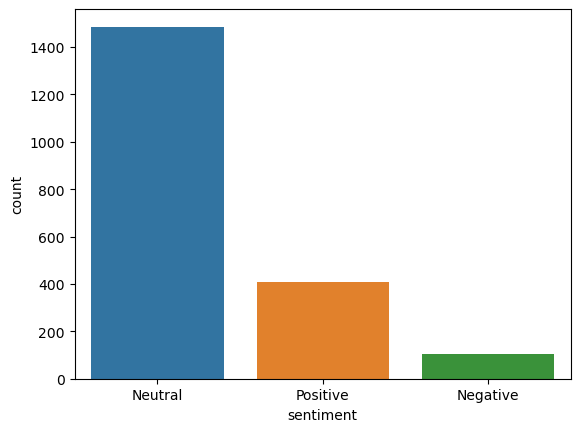

In [30]:
sns.countplot(x=df1['sentiment'])

# Analysisng +ve and -ve words per Material provided

# Lemmatization

In [31]:
# remove both the leading and the trailing characters
df_merge = [x.strip() for x in df.Text] 
df_merge

['alien',
 'ray trace cyberpunk hdr nextlevel tri',
 'great interview',
 'doge underestim',
 'congratul tesla china amaz execut last year next even',
 'happi new year',
 'frodo underdogeal thought would failhimself',
 'haha thank',
 'inde tweet definit repres realworld time alloc',
 'entertain outcom like',
 'sent',
 'agre clubhous',
 '',
 'get real',
 'bought dogecoin lil toddler hodler',
 'definit issu sentenc seem bit high',
 'thank fix',
 'pleas unlock account',
 'ufuf',
 'true power haha',
 'crypto wallet wont give privat key avoid cost',
 'app suck',
 'nasa select falcon heavi launch first two element lunar gateway togeth one mission',
 'yes',
 'predict cash flow reason well starlink ipo',
 'starlink stagger difficult technic amp econom endeavor howev',
 'spacex need pass deep chasm negat cash flow next year',
 'lowest cost per ton carbon sequest net valu product made must scalabl',
 'meant price countri differ tax amp ship',
 'intend earth may idea appli mar',
 'ufuf',
 'xprize 

In [32]:
 # remove any empty strings
df_merge = [x for x in df_merge if x]
df_merge

['alien',
 'ray trace cyberpunk hdr nextlevel tri',
 'great interview',
 'doge underestim',
 'congratul tesla china amaz execut last year next even',
 'happi new year',
 'frodo underdogeal thought would failhimself',
 'haha thank',
 'inde tweet definit repres realworld time alloc',
 'entertain outcom like',
 'sent',
 'agre clubhous',
 'get real',
 'bought dogecoin lil toddler hodler',
 'definit issu sentenc seem bit high',
 'thank fix',
 'pleas unlock account',
 'ufuf',
 'true power haha',
 'crypto wallet wont give privat key avoid cost',
 'app suck',
 'nasa select falcon heavi launch first two element lunar gateway togeth one mission',
 'yes',
 'predict cash flow reason well starlink ipo',
 'starlink stagger difficult technic amp econom endeavor howev',
 'spacex need pass deep chasm negat cash flow next year',
 'lowest cost per ton carbon sequest net valu product made must scalabl',
 'meant price countri differ tax amp ship',
 'intend earth may idea appli mar',
 'ufuf',
 'xprize team 

In [33]:
# Joining the list into one string/text
df_merge = ' '.join(df_merge)
df_merge

'alien ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year frodo underdogeal thought would failhimself haha thank inde tweet definit repres realworld time alloc entertain outcom like sent agre clubhous get real bought dogecoin lil toddler hodler definit issu sentenc seem bit high thank fix pleas unlock account ufuf true power haha crypto wallet wont give privat key avoid cost app suck nasa select falcon heavi launch first two element lunar gateway togeth one mission yes predict cash flow reason well starlink ipo starlink stagger difficult technic amp econom endeavor howev spacex need pass deep chasm negat cash flow next year lowest cost per ton carbon sequest net valu product made must scalabl meant price countri differ tax amp ship intend earth may idea appli mar ufuf xprize team manag carbon captur prize everyon tesla receiv stock comp stockopt take tabl that your miss back work seem bit high doge 

In [34]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tweet_elon = [lemmatizer.lemmatize(t,'v') for t in df_merge.split()]
print(tweet_elon)


['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'frodo', 'underdogeal', 'think', 'would', 'failhimself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'send', 'agre', 'clubhous', 'get', 'real', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'definit', 'issu', 'sentenc', 'seem', 'bite', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'ufuf', 'true', 'power', 'haha', 'crypto', 'wallet', 'wont', 'give', 'privat', 'key', 'avoid', 'cost', 'app', 'suck', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'stagger', 'difficult', 'technic', 'amp', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 

In [35]:
## loading the positive and negative emotions list
positive_words=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/positive-words.txt',encoding='cp1252',sep='delimiter',header=None,engine='python')
negative_words=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/negative-words.txt',encoding='cp1252',sep='delimiter',header=None,engine='python')


In [36]:
positive_words.head()

,0
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [37]:
negative_words.head()

,0
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [38]:
## stripping spaces
positive_words = [x.strip() for x in positive_words[0]] 
negative_words = [x.strip() for x in negative_words[0]] 

In [39]:
print('Total positive words in the material:',len(positive_words))
print('Total negative words in the material:',len(negative_words))

Total positive words in the material: 2005
Total negative words in the material: 4783


In [40]:
positive_w=[]
negative_w=[]
for word in tweet_elon:
    if word in positive_words:
        positive_w.append(word)
    if word in negative_words:
        negative_w.append(word)

In [41]:
print("Total positive words in tweets:",len(positive_w))
print("Total negative words in tweets:",len(negative_w))

Total positive words in tweets: 665
Total negative words in tweets: 359


In [42]:
from collections import Counter
pos_f= Counter(positive_w)
print(pos_f)

Counter({'great': 79, 'good': 52, 'like': 51, 'work': 49, 'well': 29, 'thank': 24, 'better': 23, 'right': 23, 'best': 23, 'cool': 21, 'love': 17, 'super': 16, 'wow': 15, 'support': 14, 'fair': 13, 'enough': 11, 'fun': 8, 'progress': 8, 'fast': 8, 'fine': 7, 'top': 7, 'worth': 7, 'success': 7, 'safe': 7, 'glad': 6, 'impress': 6, 'entertain': 5, 'clear': 5, 'hot': 5, 'tough': 5, 'faster': 5, 'rapid': 5, 'nice': 4, 'correct': 3, 'wise': 3, 'magic': 3, 'strong': 3, 'win': 3, 'prize': 2, 'cute': 2, 'warm': 2, 'smart': 2, 'free': 2, 'proud': 2, 'cure': 2, 'quiet': 2, 'wonder': 2, 'talent': 2, 'champion': 2, 'bless': 2, 'protect': 2, 'honor': 2, 'succeed': 2, 'easier': 2, 'modern': 2, 'excel': 2, 'recommend': 2, 'boost': 2, 'lover': 2, 'genius': 1, 'skill': 1, 'afford': 1, 'fresh': 1, 'classic': 1, 'greatest': 1, 'bright': 1, 'heaven': 1, 'soft': 1, 'fastest': 1, 'award': 1, 'robust': 1, 'tempt': 1, 'regard': 1, 'luck': 1, 'respect': 1, 'profound': 1, 'silent': 1, 'sweet': 1, 'freedom': 1, 'r

In [43]:
import collections
pos_15=pos_f.most_common(15)
print("Top 15 frequent positive words:\n",pos_15) 

Top 15 frequent positive words:
 [('great', 79), ('good', 52), ('like', 51), ('work', 49), ('well', 29), ('thank', 24), ('better', 23), ('right', 23), ('best', 23), ('cool', 21), ('love', 17), ('super', 16), ('wow', 15), ('support', 14), ('fair', 13)]


In [44]:
pos_15=dict(pos_15)
print(pos_15)

{'great': 79, 'good': 52, 'like': 51, 'work': 49, 'well': 29, 'thank': 24, 'better': 23, 'right': 23, 'best': 23, 'cool': 21, 'love': 17, 'super': 16, 'wow': 15, 'support': 14, 'fair': 13}


In [45]:
neg_f= Counter(negative_w)
print(neg_f)

Counter({'hard': 21, 'mar': 19, 'problem': 14, 'slow': 11, 'pleas': 9, 'static': 9, 'bad': 8, 'tank': 8, 'sever': 8, 'wild': 7, 'cold': 7, 'critic': 6, 'rough': 6, 'symptom': 6, 'lose': 6, 'limit': 6, 'burn': 5, 'die': 5, 'dumb': 4, 'break': 4, 'odd': 4, 'bug': 4, 'incorrect': 4, 'blow': 4, 'complex': 4, 'fail': 4, 'suck': 3, 'difficult': 3, 'hang': 3, 'stranger': 3, 'risk': 3, 'hell': 3, 'fallout': 3, 'twist': 3, 'wrong': 3, 'absurd': 3, 'object': 3, 'bore': 3, 'abort': 3, 'fear': 3, 'death': 3, 'attack': 3, 'loss': 3, 'pain': 2, 'scratch': 2, 'foolish': 2, 'weird': 2, 'trap': 2, 'discord': 2, 'steal': 2, 'hate': 2, 'fall': 2, 'knock': 2, 'damn': 2, 'pointless': 2, 'virus': 2, 'rumor': 2, 'fault': 2, 'trash': 2, 'tension': 2, 'crash': 2, 'rail': 2, 'error': 2, 'embarrass': 2, 'trivial': 2, 'worst': 2, 'sting': 2, 'danger': 2, 'miss': 1, 'mislead': 1, 'annoy': 1, 'grind': 1, 'toxic': 1, 'knife': 1, 'sue': 1, 'junkyard': 1, 'sick': 1, 'wack': 1, 'hazard': 1, 'stun': 1, 'sad': 1, 'joke':

In [46]:
neg_15=neg_f.most_common(15)
neg_15=dict(neg_15)
print(neg_15)

{'hard': 21, 'mar': 19, 'problem': 14, 'slow': 11, 'pleas': 9, 'static': 9, 'bad': 8, 'tank': 8, 'sever': 8, 'wild': 7, 'cold': 7, 'critic': 6, 'rough': 6, 'symptom': 6, 'lose': 6}


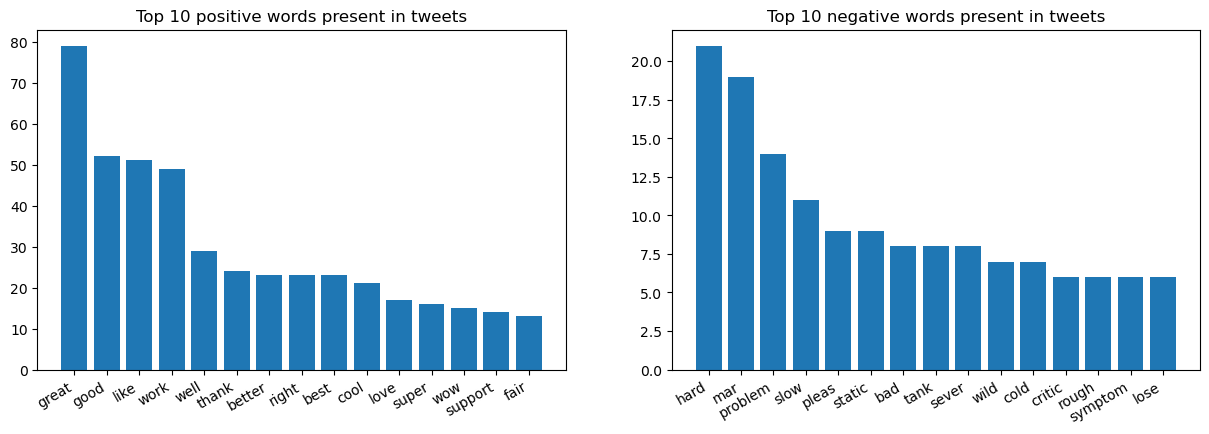

In [47]:
## Plotting top 15 positive words
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].bar(pos_15.keys(),pos_15.values())
ax[1].bar(neg_15.keys(),neg_15.values())

ax[0].set_title('Top 10 positive words present in tweets')
ax[1].set_title('Top 10 negative words present in tweets')

fig.autofmt_xdate()

plt.show()

In [48]:
from textblob import TextBlob

In [49]:
tweets=' '.join(tweet_elon)
tweets[0:50]

'alien ray trace cyberpunk hdr nextlevel tri great '

In [50]:
tweet_blob= TextBlob(tweets)
tweet_blob.sentiment

Sentiment(polarity=0.18423463151180455, subjectivity=0.47357372659546504)

In [51]:
sentiment_score = sen.polarity_scores(tweets)
sentiment_score

{'neg': 0.052, 'neu': 0.728, 'pos': 0.219, 'compound': 1.0}

# ROC Curve 

In [52]:
df2=df1.copy()

In [53]:
df2.drop("sentiment_score",axis=1,inplace=True)

In [54]:
df2.head()

,Text,sentiment
0,alien,Neutral
1,ray trace cyberpunk hdr nextlevel tri,Neutral
2,great interview,Positive
3,doge underestim,Neutral
4,congratul tesla china amaz execut last year next even,Neutral


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df2.sentiment= encoder.fit_transform(df2["sentiment"])

In [56]:
df2.head()

,Text,sentiment
0,alien,1
1,ray trace cyberpunk hdr nextlevel tri,1
2,great interview,2
3,doge underestim,1
4,congratul tesla china amaz execut last year next even,1


In [57]:
# Creating the Bag of Words model 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = TfidfVectorizer()#(max_features = 1500)  
  
# X contains corpus (dependent variable) 

X = cv.fit_transform(df1.Text.values).toarray()  
X=pd.DataFrame(X,columns=cv.get_feature_names())

/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
X

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,young,your,youv,yup,zealand,zenit,zero,zip,zon,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
y= df2.sentiment

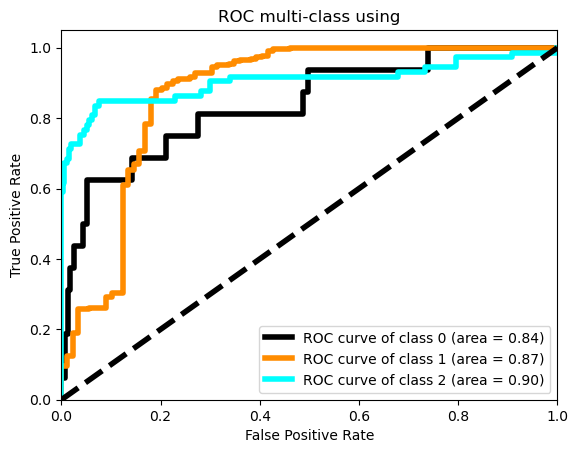

In [60]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle

#Since this is a multiclass we are going to use one vs rest 


# One Vs Rest

#For each classifier, the class is fitted against all the other classes. (only n_classes classifiers are needed)
# advantage of this approach is its interpretability. Since each class is represented by one and one 
#classifier only,gains knowledge about any particular class by inspecting its corresponding classifier. 

#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# average it and compute AUC
mean_tpr /= n_classes


# Plot  ROC curves
plt.figure()

colors = cycle(['black', 'darkorange', 'aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC multi-class using')
plt.legend(loc="lower right")
plt.show()

# WordCloud

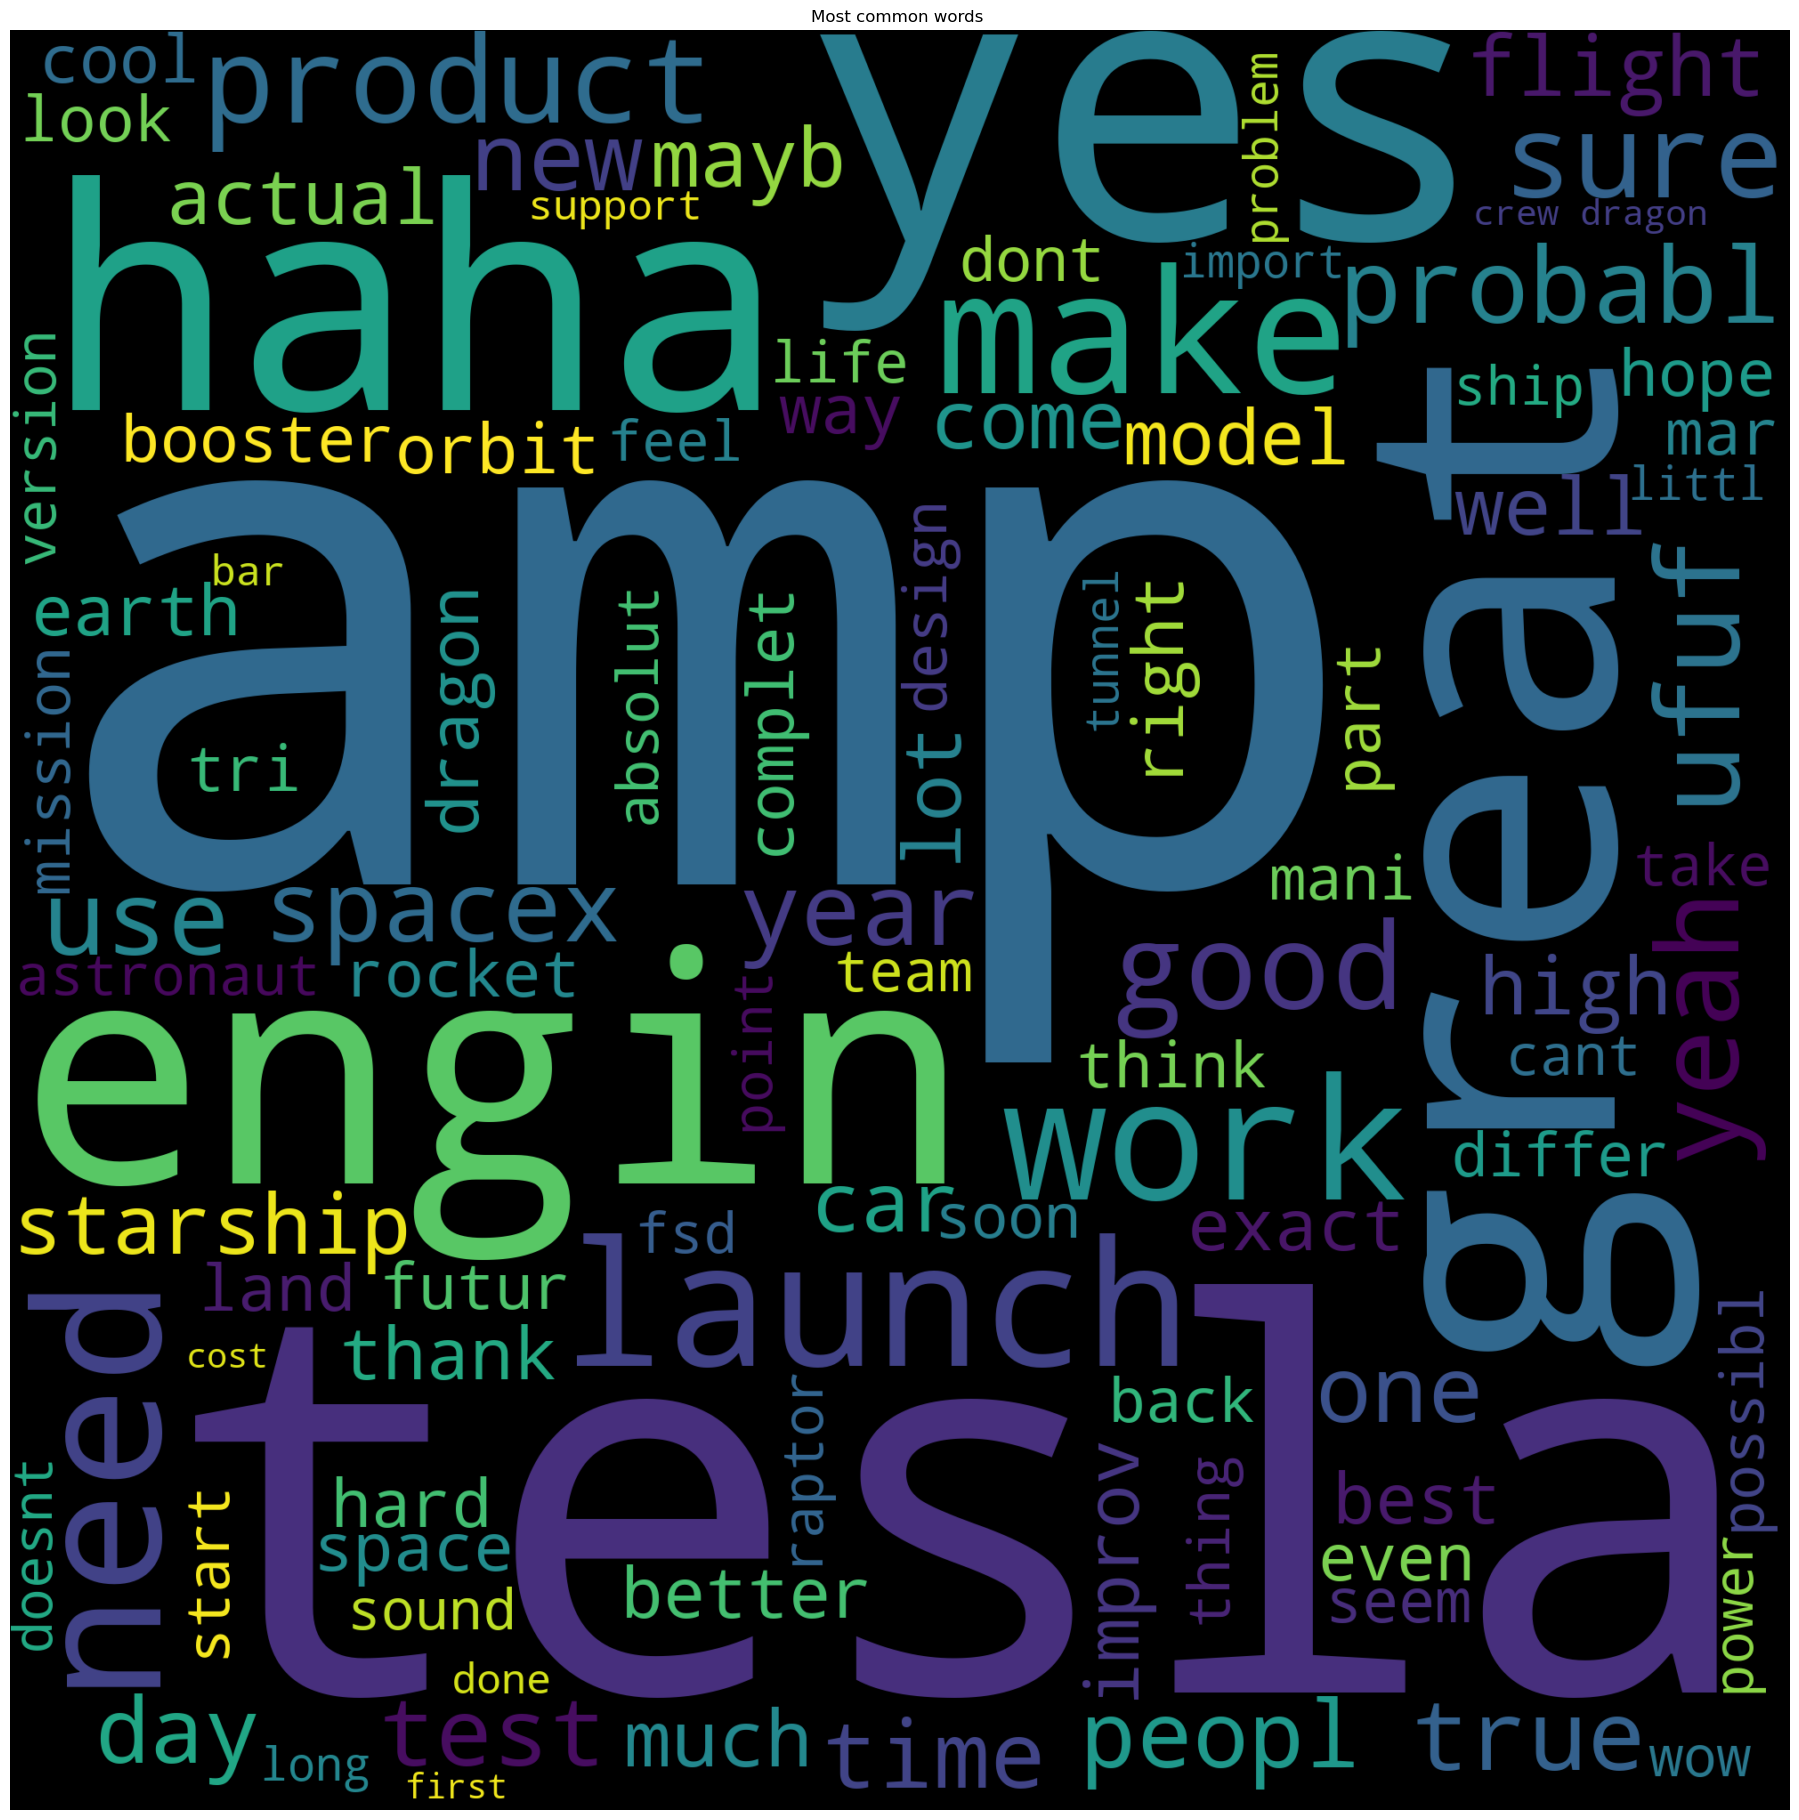

In [62]:
from wordcloud import WordCloud
dfc=' '.join(df['Text'].tolist())
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='black')
wordcloud = wordcloud.generate(dfc)
plt.figure(figsize=(20,18),dpi=100)
plt.title("Most common words ")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()